# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df_bike = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/yulu_rental.csv')
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])
df_bike.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")



In [ ]:
# Додамо додаткові колонки для аналізу
df_bike['date'] = df_bike.index.date
df_bike['day'] = df_bike.index.day
df_bike['week'] = df_bike.index.isocalendar().week
df_bike['weekday_num'] = df_bike.index.weekday
df_bike['weekday'] = df_bike.index.day_name()
df_bike['year'] = df_bike.index.year
df_bike['month'] = df_bike.index.month
df_bike['hour'] = df_bike.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df_bike['month_year'] = df_bike.index.to_period('M')
df_bike['month_year']  = df_bike.month_year.astype(str)

In [ ]:
df_bike.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month_year
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01


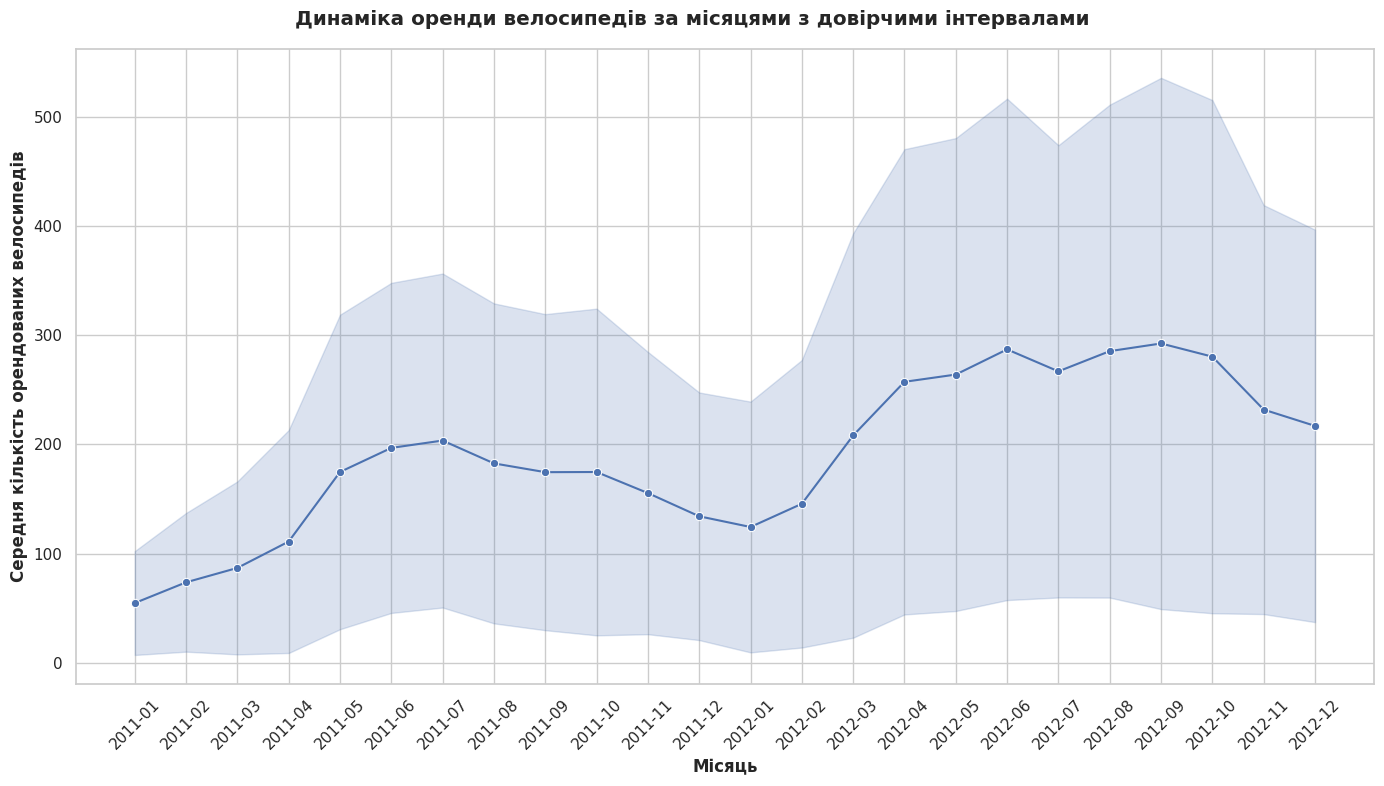

In [5]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data = df_bike,
    x = 'month_year',
    y = 'count',
    estimator='mean', #рахуємо середнє по кожному місяцю
    marker ='o',
    errorbar= 'sd')
plt.xticks(rotation=45)
plt.suptitle ('Динаміка оренди велосипедів за місяцями з довірчими інтервалами', fontweight = 'bold')
plt.xlabel ('Місяць', fontweight = 'bold')
plt.ylabel ('Середня кількість орендованих велосипедів', fontweight = 'bold')
plt.tight_layout();

найбільша невизначеність в даних спостерігається з квітня 2012 року, пік сягає в вересні 2012 року

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

In [ ]:
plt.

''

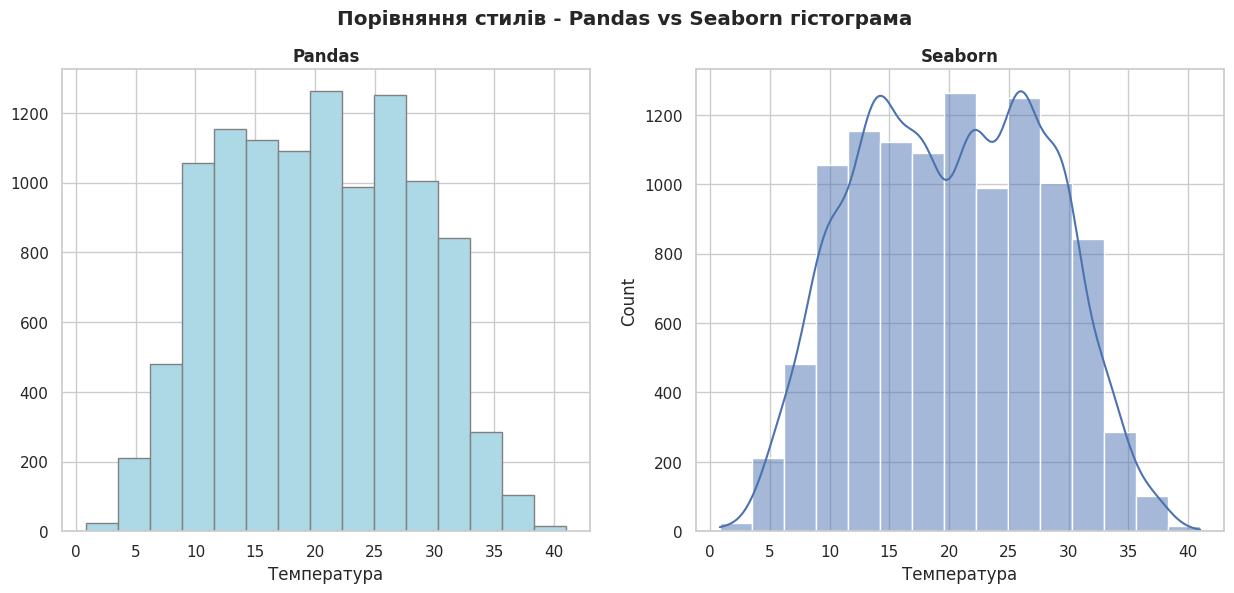

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Порівняння стилів - Pandas vs Seaborn гістограма', fontweight='bold')

ax[0].hist(df_bike['temp'], bins=15,  edgecolor = 'gray', color = 'lightblue')
ax[0].set_title('Pandas', fontweight='bold')
ax[0].set_xlabel('Температура')
#x[0].set_ylabel('Частота')

ax[1] = sns.histplot(df_bike['temp'], bins=15, kde = True)
ax[1].set_title('Seaborn', fontweight='bold')
ax[1].set_xlabel('Температура')
#ax[1].set_ylabel('Частота');

## відповіді

1. При побудові графіку за допомогою Pandas, необхідно додавати лінії бінів для більш чіткого зображення графіку, в той же час в Seaborn біни вже розподілені і прозорі (для мене це візуально приємніше), зручніше бачити розподіли, також стандартний колір більш приємніший

2. при параметрі kde = True, з'являється лінія оцінки щільності розподілу, тобто як часто зустрічаються данні в датасеті

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

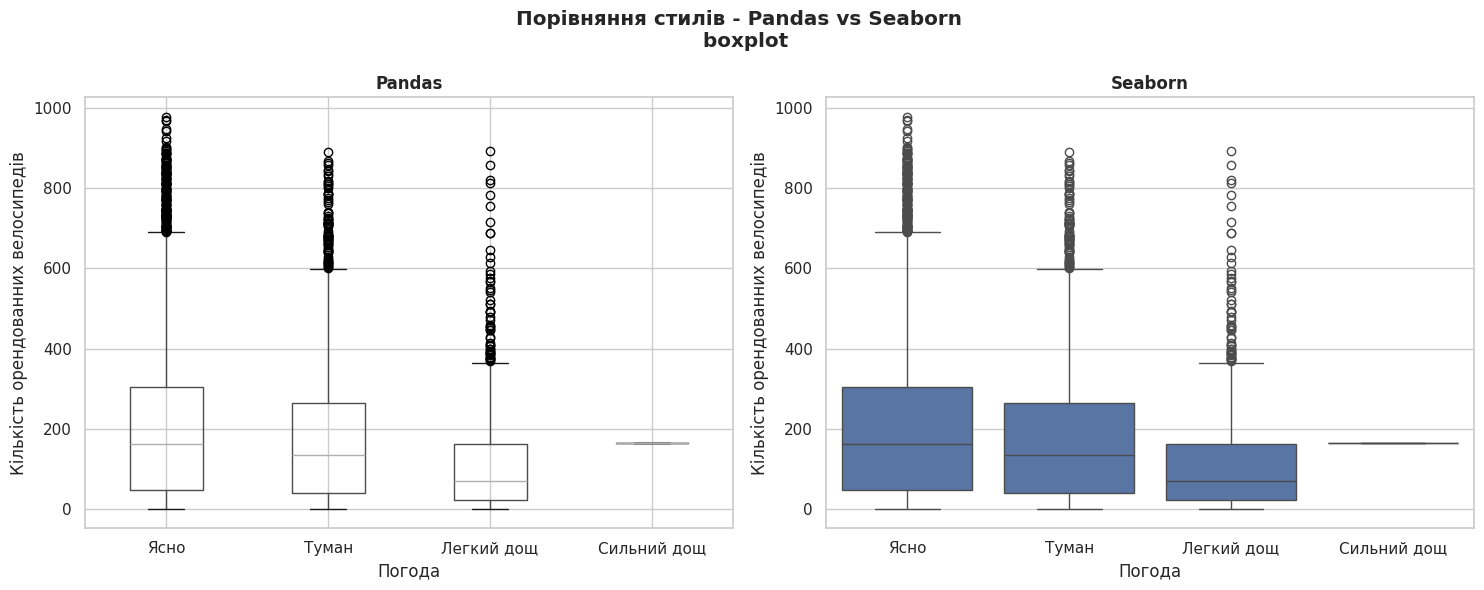

In [ ]:
weather_labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'];

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

df_bike.boxplot(
    column='count',
    by='weather',
    ax = ax [0]
)
ax[0].set_title('Pandas', fontweight='bold')
ax[0].set_xlabel('Погода')
ax[0].set_ylabel('Кількість орендованних велосипедів')
ax[0].set_xticks([1, 2, 3, 4], labels = weather_labels)


sns.boxplot(
    data = df_bike,
    x = 'weather',
    y = 'count' ,
    ax = ax[1])
ax[1].set_title('Seaborn', fontweight='bold')
ax[1].set_xlabel('Погода')
ax[1].set_ylabel('Кількість орендованних велосипедів')
ax[1].set_xticks([0, 1, 2, 3], labels = weather_labels)

plt.suptitle('')
plt.suptitle('Порівняння стилів - Pandas vs Seaborn \n boxplot', fontweight='bold')
plt.tight_layout();

В seaborn boxplot більш ширший і має колір, з кольором зручніше, т.я. дані не зливаються

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [ ]:
df_bike.head (2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
corr_bike = df_bike.corr()

In [ ]:
corr_bike.round(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000,0.029,-0.008,0.009,0.259,0.265,0.191,-0.147,0.097,0.164,0.163
holiday,0.029,1.000,-0.250,-0.007,0.000,-0.005,0.002,0.008,0.044,-0.021,-0.005
workingday,-0.008,-0.250,1.000,0.034,0.030,0.025,-0.011,0.013,-0.319,0.119,0.012
weather,0.009,-0.007,0.034,1.000,-0.055,-0.055,0.406,0.007,-0.136,-0.109,-0.129
temp,0.259,0.000,0.030,-0.055,1.000,0.985,-0.065,-0.018,0.467,0.319,0.394
atemp,0.265,-0.005,0.025,-0.055,0.985,1.000,-0.044,-0.057,0.462,0.315,0.390
humidity,0.191,0.002,-0.011,0.406,-0.065,-0.044,1.000,-0.319,-0.348,-0.265,-0.317
windspeed,-0.147,0.008,0.013,0.007,-0.018,-0.057,-0.319,1.000,0.092,0.091,0.101
casual,0.097,0.044,-0.319,-0.136,0.467,0.462,-0.348,0.092,1.000,0.497,0.690
registered,0.164,-0.021,0.119,-0.109,0.319,0.315,-0.265,0.091,0.497,1.000,0.971


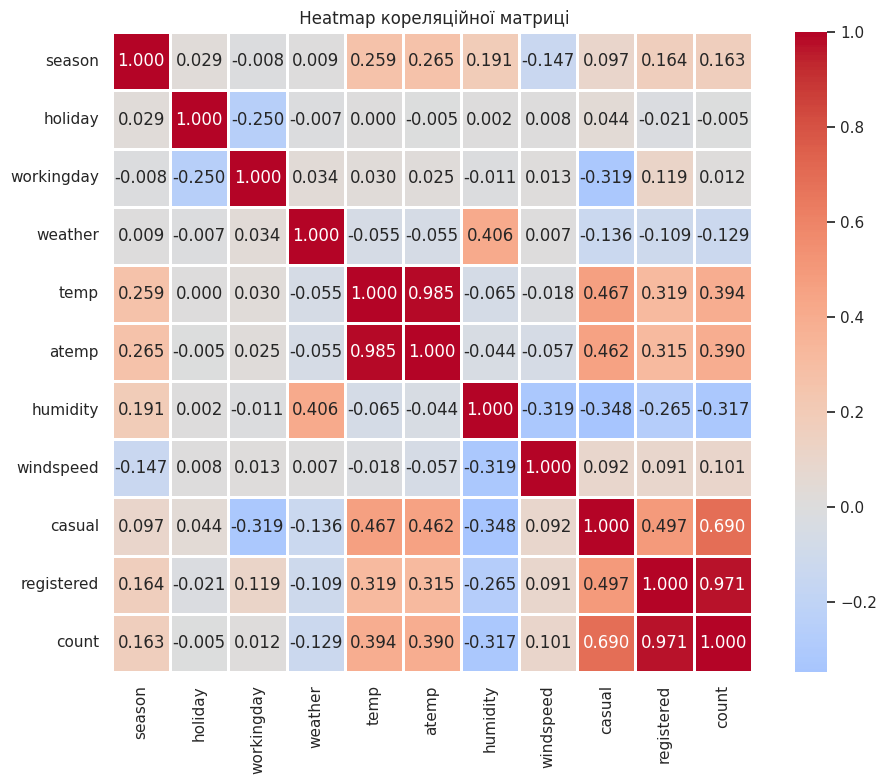

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_bike,
            annot=True,
            fmt = '.3f', # округлення до 3-х знаків після коми
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1
            )


plt.title(' Heatmap кореляційної матриці')
plt.tight_layout();

## відповіді

1. Найсильніше кореллюють змінні:

 - registered	- 0,971
 - casual - 0,69

що є логічним, так як ці показники є частиною count (чим більше зарєєстрованих користувачів, тим більше попит...бо навіщо реєструватись і не використовувати сервіс))) )

2. корреляция між temp i atemp 0.985 майже 1, тому що atemp - це відчуття температури, тобто та ж температура, але з урахуванням вологості, вітру і т.д.

3. всі змінні час від часу мають негаивну корреляцію

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


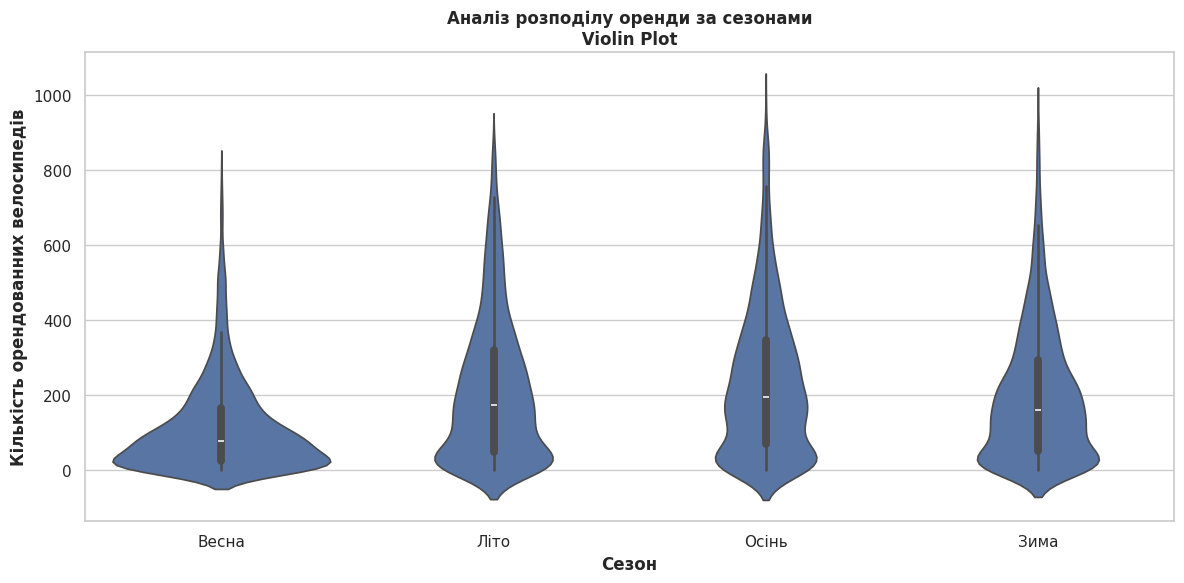

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot (data=df_bike, x='season', y='count')

plt.title('Aналіз розподілу оренди за сезонами\n Violin Plot ', fontweight = 'bold')
plt.xlabel('Сезон', fontweight = 'bold')
plt.ylabel('Кількість орендованних велосипедів', fontweight = 'bold')
plt.xticks([0, 1, 2, 3], ['Весна', 'Літо', 'Осінь', 'Зима'])
#plt.grid(True)
plt.tight_layout();


## відповіді

1. "товщина" скрипки показує наскільки багато спостережень в цьому періоді
2. найбільша варіабельність оренди - восени, т.я. скрипка довша по вертикалі, що говорить про те, що дані сильно розкидані
3. violin plot показує більше інформації про розподіл даних, тобто не лише min, max, медіану, квартилі, а й дає можливість побачити наскільки часто зустрічаються дані

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

In [ ]:
# Додаємо назви сезонів, підгледіла вирішення питання в підказках до наступного ДЗ)))
season_map = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df_bike['season_name'] = df_bike['season'].map(season_map)

In [ ]:
sample_df = df_bike[['temp', 'humidity', 'windspeed', 'count', 'season_name']]


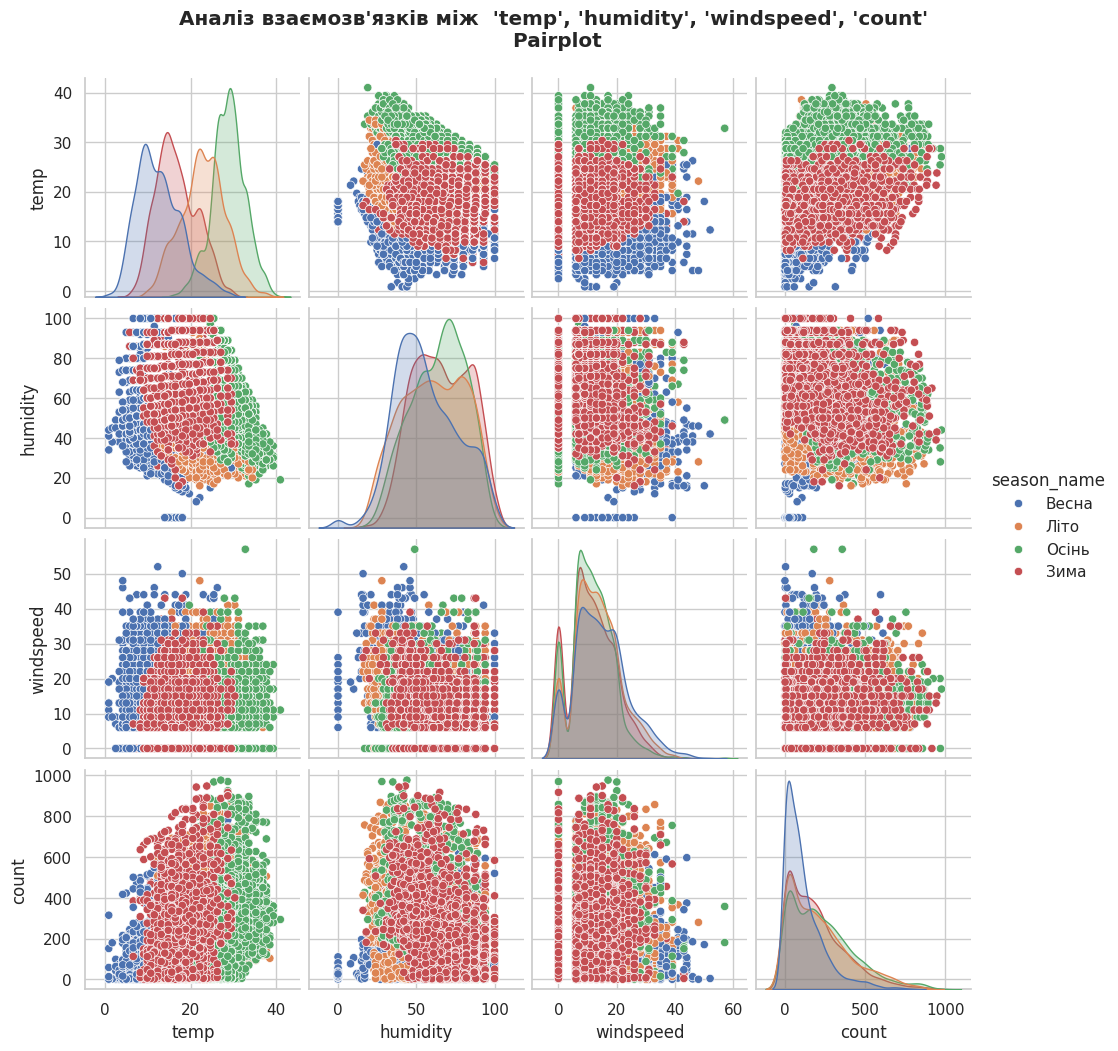

In [ ]:

sns.pairplot(sample_df, hue='season_name')
plt.suptitle("Aналіз взаємозв'язків між  'temp', 'humidity', 'windspeed', 'count'\n Pairplot",
             y = 1.05,  fontweight='bold')
plt.tight_layout;

## відповіді

1. найсильніший лінійний зв'язок між temp та count, чим вище температура, чим більше оренд

2. temp, на графіку піки сезонів розділені, а не зливаються до одного

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

In [6]:
# Додаємо назви будні/ вихіднi, підгледіла вирішення питання в підказках до наступного ДЗ)))
workingday_map = {1: 'Робочий день', 0: 'Вихідний день'}
df_bike['workingday_name'] = df_bike['workingday'].map(workingday_map)

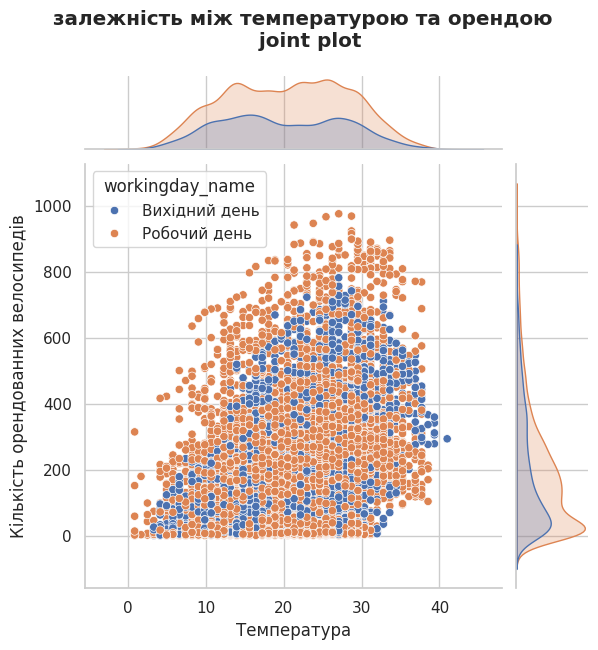

In [7]:
sns.jointplot(data=df_bike, x='temp', y='count', hue='workingday_name')
plt.suptitle('залежність між температурою та орендою \n joint plot', y = 1.08,   fontweight='bold')
plt.xlabel('Температура')
plt.ylabel('Кількість орендованних велосипедів')
plt.tight_layout;
#розшифровка легенди: 0 - не робочій день (вихідний), 1 - робочий (будній)

## відповіді

1. зверху графік показую розподіл температури по робочим дням (помаранчевий) і вихідним (синій), а справа - розподіл кількості оренд теж по робочим і вихідним дням

2. так, різниця є, оренд більше в робочі дні(помаранчивий колір), ніж в вихідні. Можливо, велосипеди активно орендуються для поїздок на роботу

